In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.metrics import f1_score

In [2]:
df = pd.read_csv('../data/06.05위험운전가속.csv')
df

,날짜,번호판,일일주행거리,누적주행거리,정보발생일시,차량속도,RPM,브레이크,GPS_X,GPS_Y,...,월,일,시,분,초,가속도max,가속도min,가속도max2,가속도,위험운전가속
0,20221201,부산70자1854,0,66443,22120105071500,0,193,0,129.158670,35.236021,...,12,1,5,7,15,9.212774,6.010222,12.415327,0,0
1,20221201,부산70자1854,0,66443,22120105071600,0,388,0,129.158670,35.236021,...,12,1,5,7,16,9.212774,6.010222,12.415327,0,0
2,20221201,부산70자1854,0,66443,22120105071700,0,777,0,129.158670,35.236021,...,12,1,5,7,17,9.212774,6.010222,12.415327,0,0
3,20221201,부산70자1854,0,66443,22120105071800,0,638,0,129.158670,35.236021,...,12,1,5,7,18,9.212774,6.010222,12.415327,0,0
4,20221201,부산70자1854,0,66443,22120105071900,0,461,0,129.158670,35.236021,...,12,1,5,7,19,9.212774,6.010222,12.415327,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4462382,20221231,부산70자1894,176,3095705,22123121033800,0,331,0,129.158597,35.235956,...,12,31,21,3,38,9.212774,6.010222,12.415327,0,0
4462383,20221231,부산70자1894,176,3095705,22123121033900,0,59,0,129.158597,35.235956,...,12,31,21,3,39,9.212774,6.010222,12.415327,0,0
4462384,20221231,부산70자1894,176,3095705,22123121034000,0,0,0,129.158597,35.235956,...,12,31,21,3,40,9.212774,6.010222,12.415327,0,0
4462385,20221231,부산70자1894,176,3095705,22123121034100,0,0,0,129.158597,35.235956,...,12,31,21,3,41,9.212774,6.010222,12.415327,0,0


In [3]:
l = [0.001, 0.003, 0.005, 0.01, 0.015, 0.02, 0.03, 0.05, 0.1, 0.15, 0.2, 0.3]
# l = [0.001, 0.003]
accuracy = []
f1 = []
drop = []

In [4]:
for i in l:
    df = pd.read_csv('../data/06.05위험운전가속.csv')
    acc0 = df.query('위험운전가속 == 0')
    X_train, X_test, y_train, y_test = train_test_split(acc0, acc0, random_state=42, shuffle=True, test_size=i)
    df = df.query('위험운전가속 != 0')
    drop.append(len(X_test.index))
    df = pd.concat([df, X_test], axis=0)
    X = df[['시', '분', 'GPS_X', 'GPS_Y']]
    y = df['위험운전가속']
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, shuffle=True, test_size=0.3)
    model = XGBClassifier(objective='multi:softmax', num_class=4)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy.append(accuracy_score(y_pred, y_test))
    f1.append(f1_score(y_pred, y_test, average='weighted'))

In [5]:
print(accuracy)
print(f1)
print(drop)

[0.9004823151125402, 0.811247242172464, 0.7541866778032992, 0.7002814873003405, 0.6949864097526844, 0.7048393730292921, 0.7472446472446472, 0.8057836872204971, 0.8848376996976103, 0.9202579507759401, 0.9389696534973403, 0.9584799590092616]
[0.9385852941545696, 0.8615736169620728, 0.7961111561725976, 0.7124950669472208, 0.7009067699666398, 0.7176583875121986, 0.7771163293177904, 0.8573569664734861, 0.9333020096775262, 0.9568475958084206, 0.9680431755824186, 0.978699773718545]
[4405, 13214, 22023, 44046, 66069, 88092, 132138, 220230, 440460, 660690, 880919, 1321379]


In [6]:
temp = pd.read_csv('../data/06.05위험운전가속.csv')
temp = temp.query('위험운전가속 != 0')
len(temp.index)

57793

In [7]:
d = list(map(lambda x: int(x / (57793 + x) * 100), drop))
d

[7, 18, 27, 43, 53, 60, 69, 79, 88, 91, 93, 95]

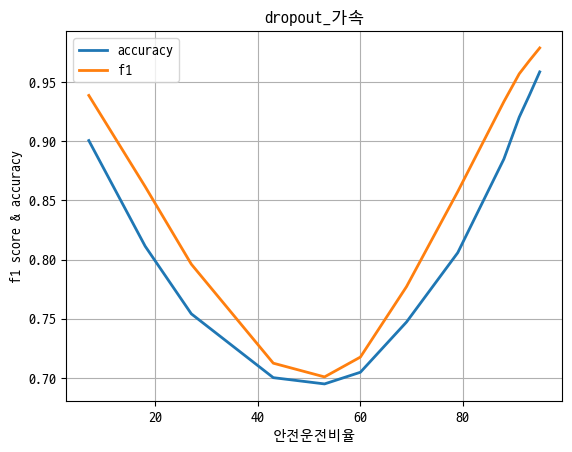

In [10]:
import matplotlib.pyplot as plt

plt.rc('font', family='D2Coding')
plt.title('dropout_가속')

plt.plot(d, accuracy, linewidth=2)
plt.plot(d, f1, linewidth=2)

plt.xlabel('안전운전비율')
plt.ylabel('f1 score & accuracy')

plt.grid(True)
plt.legend({'accuracy': accuracy, 'f1': f1})
plt.show()